In [155]:
import control as ct 
import matplotlib.pyplot as plt 
import numpy as np 


# Primeira Questão

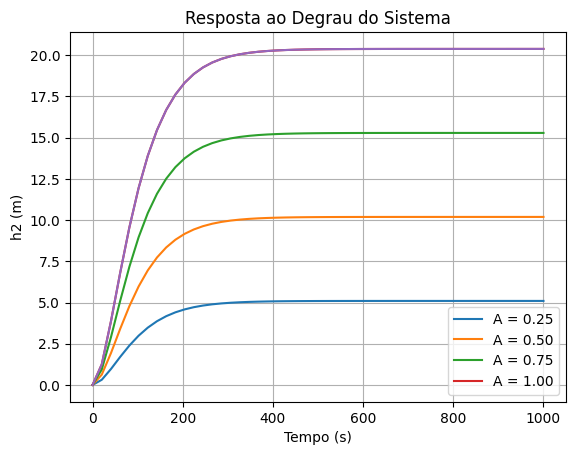

Valor da saída no estado estacionário (A=0.25): 5.096


In [156]:
num = [0.007848]
den = [1, 0.040221, 0.000385]
    
# Criando o sistema de controle com a função de transferência
sys = ct.tf(num, den)

# Criando um loop para plotar a resposta ao degrau para difertes valores de A
for A in np.arange(0.25,1.25, 0.25):
    t, y = ct.step_response(sys * A, T=np.linspace(0, 1000))
    plt.plot(t, y, label=f'A = {A:.2f}')
# Plotando a resposta ao degrau
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('h2 (m)')
plt.grid(True)
plt.legend()
plt.show()
t, y = ct.step_response(sys * 0.25, T=np.linspace(0, 1000, 2000)) 
print(f"Valor da saída no estado estacionário (A=0.25): {y[-1]:.3f}")

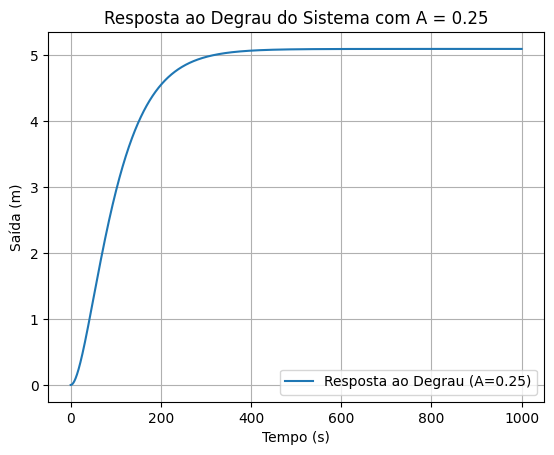

In [157]:
# Plot do gráfico da resposta ao degrau com amplotude A = 0.25

plt.plot(t, y, label='Resposta ao Degrau (A=0.25)')
plt.title('Resposta ao Degrau do Sistema com A = 0.25')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída (m)')
plt.grid(True)
plt.legend()

# Segunda Questão

Tempo de Estabilização (t_s): 311.66 s
Tempo de Subida (t_r): 177.59 s


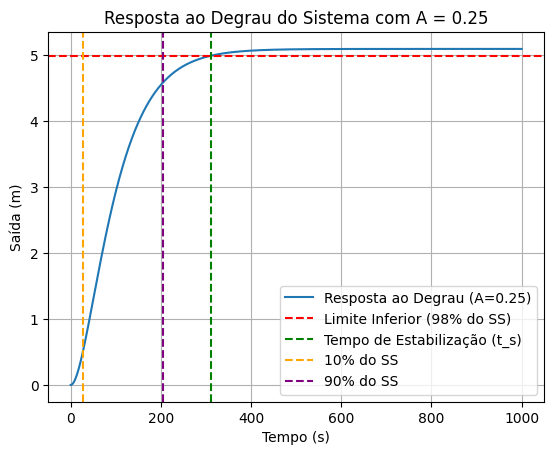

In [158]:
# Para um degrau com amplitude de 0.25 m, calculamos o ganho K do sistema.
y_ss = y[-1]

# Tempo de Estabilização (t_s)
limite_inferior = y_ss * 0.98
t_s = t[np.where(y >= limite_inferior)[0][0]]

# Tempo de Subida (t_r)
limite_t10 = y_ss * 0.1
limite_t90 = y_ss * 0.9
idx_10 = np.where(y >= limite_t10)[0][0]
idx_90 = np.where(y >= limite_t90)[0][0]
t_10 = t[idx_10]
t_90 = t[idx_90]
t_r = t_90 - t_10

# Print dos resultados
print(f"Tempo de Estabilização (t_s): {t_s:.2f} s")
print(f"Tempo de Subida (t_r): {t_r:.2f} s")

# Plot do gráfico da resposta ao degrau com amplotude A = 0.25 e as características do sistema 
plt.plot(t, y, label='Resposta ao Degrau (A=0.25)')
plt.axhline(y=limite_inferior, color='r', linestyle='--', label='Limite Inferior (98% do SS)') 
plt.axvline(x=t_s, color='g', linestyle='--', label='Tempo de Estabilização (t_s)')
plt.axvline(x=t_10, color='orange', linestyle='--', label='10% do SS')
plt.axvline(x=t_90, color='purple', linestyle='--', label='90% do SS')
plt.title('Resposta ao Degrau do Sistema com A = 0.25')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída (m)')
plt.grid(True)
plt.legend()
plt.show()  


# Terceira questão

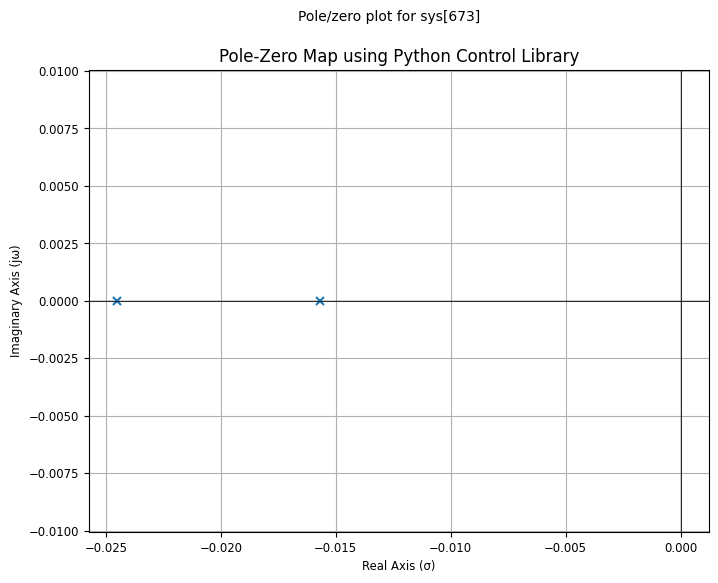


Poles of the system:
[-0.0245187+0.j -0.0157023+0.j]

Zeros of the system:
[]


In [159]:
# define os coeficientes do numerador e denominador
# para P(s) = 1 / (s^2 + 0.0407221s + 0.099385)
numerator_coeffs = [0.007848]
denominator_coeffs = [1, 0.040221, 0.000385]

# cria a função de transferência
system = ct.tf(numerator_coeffs, denominator_coeffs)

# plota o mapa de polos e zeros
plt.figure(figsize=(8, 6))
ct.pzmap(system)

# título e rótulos
plt.title('Pole-Zero Map using Python Control Library')
plt.xlabel('Real Axis (σ)')
plt.ylabel('Imaginary Axis (jω)')

# eixos real e imaginário no gráfico
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

# adiciona grid
plt.grid(True)

# salva o gráfico
plt.savefig('pole_zero_map_control.png')

plt.show()

print("\nPoles of the system:")
print(ct.poles(system))
print("\nZeros of the system:")
print(ct.zeros(system))
     